<a href="https://colab.research.google.com/github/YesidCastelblanco/Taller_aprendizaje_automatico/blob/main/Ejercicio_2_Aprendizaje_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 3

### Integrantes

- Andres Felipe Borrero
- Yesid Castelblanco
- Nicolas Colmenares
- Carlos Alberto Martinez

### **Profesores**

- Santiago Ortiz
- Henry Velasco

**Notas:**
-	Todas las respuestas, gráficas, tablas y operaciones deben ser debidamente justificadas.
-	La información que sea obtenida de alguna fuente debe ser citada y referenciada en el documento a entregar.


# Ejercicio 2

2)	El conjunto de datos *“YearPredictionMSD”* contiene información sobre canciones de música po- pular y el año en que se grabaron. Incluye 515345 observaciones y 90 características, como la intensidad media del sonido, la varianza del espectro de frecuencia y la correlación entre las características espectrales. El objetivo es predecir el año en que se grabó la canción.
* Carque el conjunto de datos usando la función *read_csv *del paquete **pandas** y el como primer argumento el Link, use como segundo argumendo *header = None*.
* Divida el conjunto de datos en características o variables explicativas X y variable objetivo Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.
* Reduzca la dimensión de las variables. Para ello, use un modelo de regresión **LASSO** con un coeficiente de penalización de 10, para extraer características importantes del conjunto de variables explicativas.
* Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su
significancia y su R2 .
* Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la conveniencia de usar este modelo para predecir el año de grabación de la canción.




---


# Carque el conjunto de datos usando la función read_csv del paquete *pandas* y como primer argumento el Link, use como segundo argumendo *header = None.


---




El conjunto de datos "YearPredictionMSD" contiene información sobre canciones con unas caracteristicas extraidas de los archivos de audio y el objetivo es predecir el año en el que cada canción fue grabada.

In [153]:
# Cargamos la libreria Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el conjunto de datos por medio de la función read_csv de pandas

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"

df = pd.read_csv(data_url, header=None)

---


**Consultamos las primeras (#) filas del dataset**


---

In [67]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


---


**Consultamos las ultimas (#) filas del dataset**


---

In [68]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909
515344,2005,51.85726,59.11655,26.39436,-5.46030,-20.69012,-19.95528,-6.72771,2.29590,10.31018,...,-11.50511,-69.18291,60.58456,28.64599,-4.39620,-64.56491,-45.61012,-5.51512,32.35602,12.17352


In [4]:
# Consultamos los tipos de datos de las variables en el DataFrame para poder decidir métodos adecuados para la visualización de los datos mediante analisis bivariado

df.dtypes

# Pandas almacena las variables categóricas como 'object' y las variables continuas se almacenan como int o float

,0
0,int64
1,float64
2,float64
3,float64
4,float64
...,...
86,float64
87,float64
88,float64
89,float64


In [111]:
# Eliminamos filas con valores NaN
df = df.dropna()

In [112]:
# Verificamos si hay valores faltantes

print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
     ..
86    0
87    0
88    0
89    0
90    0
Length: 91, dtype: int64


---


***VISUALIZACIÓN DE LOS DATOS DEL DATAFRAME***



---

In [113]:
# Resumen del Dataframe útil para depuración y comprensión inicial de los datos
# Podemos ver cuántos valores no nulos hay en cada columna lo que ayuda a identificar la presencia de valores faltantes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

---


***Caracteristicas estadisticas del dataframe***


---

In [114]:
# Mostrar caracteristicas estadísticas de los datos en un DataFrame para identificar anomalias o patrones

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


---


***NUMERO DE COLUMNAS Y NUMERO DE FILAS DEL DATAFRAME***


---

In [115]:
# Obtener información sobre dimensiones de un DataFrame

df.shape

# (filas, columnas)

(515345, 91)



---


# Divida el conjunto de datos en características o variables explicativas X y variable objetivo Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.


---



Como variable objetivo tenemos el año de grabación de la canción, las demás columnas corresponden a las caracteristicas de las canciones.



In [154]:
# Seleccionamos la primera columna que corresponde a "Year" y es la variable objetivo. Estos lo hacemos utilizando la función de pandas df.iloc[filas, columnas]

Y = df.iloc[:, 0].values

# Todas las columnas menos la primera, quedan las características o variables explicativas

X = df.iloc[:, 1:].values


In [117]:
# Comprobamos que (X) contiene las caracteristicas

X

array([[ 4.994357e+01,  2.147114e+01,  7.307750e+01, ..., -1.822230e+00,
        -2.746348e+01,  2.263270e+00],
       [ 4.873215e+01,  1.842930e+01,  7.032679e+01, ...,  1.204941e+01,
         5.843453e+01,  2.692061e+01],
       [ 5.095714e+01,  3.185602e+01,  5.581851e+01, ..., -5.859000e-02,
         3.967068e+01, -6.634500e-01],
       ...,
       [ 4.512852e+01,  1.265758e+01, -3.872018e+01, ..., -6.071710e+00,
         5.396319e+01, -8.093640e+00],
       [ 4.416614e+01,  3.238368e+01, -3.349710e+00, ...,  2.032240e+01,
         1.483107e+01,  3.974909e+01],
       [ 5.185726e+01,  5.911655e+01,  2.639436e+01, ..., -5.515120e+00,
         3.235602e+01,  1.217352e+01]])

In [118]:
# Comprobamos que (Y) contiene la variable objetivo

Y

array([2001, 2001, 2001, ..., 2006, 2006, 2005])



---


# Reduzca la dimensión de las variables. Para ello, use un modelo de regresión LASSO con un coeficiente de penalización de 10, para extraer características importantes del conjunto de variables explicativas.


---



El conjunto de datos que usamos en nuestro ejercicio es complejo debido a que las caracteristicas presentes tienen unidades y escalas muy diferentes lo cual permite que algunas caracteristicas dominen el modelo mientras que otras sean menos significativas, debido a esto, es importante normalizar o estandarizar las caracteristicas.

In [155]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos las caracteristicas

Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)



---
**Reducimos la dimensionalidad con el modelo de regresión LASSO**


---



Usamos un modelo de regresión LASSO con un coeficiente de penalización o parámetro alpha de 10. El modelo   realiza una regularización (penalización) y puede reducir algunos coeficientes a cero, de esa manera ayuda a identificar las características más importantes.

***Dividimos el conjunto de datos en entrenamiento y prueba***

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

***Ajustamos el modelo de regresión LASSO***

In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Crear el modelo Lasso con un coeficiente de penalización de 10
lasso = Lasso(alpha=10)

# Ajustar el modelo Lasso a los datos
lasso.fit(X_train, y_train)

Lasso(alpha=10)

***Evaluamos el modelo***

In [158]:
score = lasso.score(X_test, y_test)
print(f'R² en el conjunto de prueba: {score:.4f}')


R² en el conjunto de prueba: -0.0000


***Examinamos los coeficientes del modelo***

El modelo LASSO establece los coeficientes de algunas caracteristicas a 0 para reducir la dimensionalidad. Las caracteristicas con coeficientes diferentes a 0 con las que tienen mas relevancia.

In [159]:
# Coeficientes del modelo

coefficients = lasso.coef_
print("Coeficientes del modelo LASSO:")
print(coefficients)

Coeficientes del modelo LASSO:
[ 0.  0. -0. -0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0.  0.  0.
 -0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0.  0. -0.  0. -0. -0.
 -0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0.  0. -0.
  0.  0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0.
  0.  0.  0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0.  0. -0.  0. -0.]


In [160]:
# Identificamos las caracteristicas seleccionadas (coeficientes no nulos)

selected_features = np.where(coefficients != 0)[0]
print(f'Número de características seleccionadas: {len(selected_features)}')
print(f'Índices de las características seleccionadas: {selected_features}')

Número de características seleccionadas: 0
Índices de las características seleccionadas: []


In [171]:
# Consultamos las caracteristicas seleccionadas

print(f'Coeficientes: {coefficients[selected_features]}')

Coeficientes: []


***Reducimos las dimensiones***

In [176]:
# Creamos un nuevo conjunto de datos solo con las caracteristicas seleccionadas

X_selected = X_train[:, selected_features]
print(X_selected.shape)

(412276, 0)


Si obtenemos 0 como resultado tanto en el número de características seleccionadas como en los índices de características seleccionadas, esto indica que el modelo no ha seleccionado ninguna característica (es decir, todos los coeficientes son cero).

El modelo LASSO (Least Absolute Shrinkage and Selection Operator) puede hacer que todos los coeficientes se reduzcan a cero si el valor del parámetro de regularización (alpha) es muy grande. Esto sucede porque el LASSO penaliza fuertemente los coeficientes, y en situaciones extremas, puede hacer que todos los coeficientes sean cero, lo que significa que no se selecciona ninguna característica.

Teniendo en cuenta lo anterior, ajustamos el alpha dado a que alpha = 10 es demasiado grande. Lo ajustamos cuidadosamente para balancear la penalización y la capacidad predictiva del modelo, tampoco lo podemos dejar muy pequeño porque el modelo puede sobreajustarse (overfitting).

Una forma muy comun de ajuste es utilizando tecnicas de validación cruzada, para ello vamos a utilizar el modelo LassoCV el cual ajusta automaticamente el mejor valor de alpha.


In [191]:

from sklearn.linear_model import Lasso, ElasticNet, LassoCV, ElasticNetCV
import pandas as pd
import numpy as np

modelo_lasso = LassoCV(alphas = np.logspace(-5, 2, 100),
                       fit_intercept = True,
                       #normalize = True,
                       cv = 10)

modelo_lasso.fit(X, Y)

# Imprimir el mejor valor de alpha y el coeficiente

print(f"Coeficientes del modelo: {modelo_lasso.coef_}")
print(f"Mejor alpha seleccionado: {modelo_lasso.alpha_}")

Coeficientes del modelo: [ 8.74405774e-01 -5.61905933e-02 -4.35410653e-02  2.57668541e-03
 -1.46600182e-02 -2.19396876e-01 -6.23253677e-03 -1.00229980e-01
 -6.99138715e-02  2.45172175e-02 -1.62656132e-01 -2.29914235e-03
  4.69101974e-02  3.54928772e-04 -4.23969513e-04  6.01459000e-04
  4.77043738e-04  1.46902802e-03  1.92420543e-03  2.13384327e-03
  7.68640103e-04 -4.04820882e-04  7.54250198e-03  2.80667142e-03
 -3.54616975e-03  7.07143244e-05  1.59050740e-03  5.26923687e-04
  8.73645101e-04 -3.00878682e-04 -1.41109129e-03 -1.39883433e-03
 -5.55268104e-03  2.44647086e-03  1.83837878e-03 -5.28649664e-03
 -2.74483778e-04  6.80560172e-04  1.36830314e-03 -1.70818021e-03
 -2.01071028e-03 -7.64717873e-04 -1.40561111e-03 -2.34890863e-03
 -3.16450215e-03  6.76795146e-03  4.55124819e-04 -2.07385958e-03
  2.73147217e-04  1.93603183e-03  2.17116566e-04 -1.59976342e-03
  1.94624948e-03  4.80181894e-04 -7.44520366e-05  1.57596723e-04
 -1.89876263e-03  1.94239240e-03 -1.30708323e-03  2.24835437e-04


En este caso, LassoCV selecciona el valor de alpha que minimiza el error de validación, y no es tan grande como para reducir todos los coeficientes a cero, pero tampoco es tan pequeño como para permitir un sobreajuste.

***Mejor alpha : 0.0093***

In [207]:
# Crear el modelo Lasso con un coeficiente de penalización de 10
lasso = Lasso(alpha=0.0093)

In [208]:
# Ajustar el modelo Lasso a los datos
lasso.fit(X_train, y_train)

Lasso(alpha=0.0093)

In [209]:
# Coeficientes del modelo

coefficients = lasso.coef_
print("Coeficientes del modelo LASSO:")
print(coefficients)

Coeficientes del modelo LASSO:
[ 5.23245271e+00 -2.84654225e+00 -1.48739861e+00 -0.00000000e+00
 -3.12246504e-01 -2.80257968e+00 -8.31379120e-02 -7.43421503e-01
 -7.15425656e-01  1.58889741e-01 -6.70163327e-01 -1.70992352e-02
  1.00755829e+00  6.10234375e-01 -5.22237132e-01  6.21811702e-01
  2.04929282e-01  8.10870793e-01  6.17198998e-01  6.60120869e-01
  1.26323637e-01 -0.00000000e+00  1.40861001e+00  4.19598385e-01
 -3.91859637e-01  3.05924229e-02  8.49015669e-01  1.06800056e-01
  1.22157050e-01 -2.34233001e-02 -1.24961304e-01 -9.09377730e-02
 -3.75704239e-01  1.18055776e-01  5.27877205e-02 -5.36975100e-01
 -7.88887393e-02  3.18795137e-01  3.69961945e-01 -3.47731546e-01
 -2.53169543e-01 -1.08127176e-01 -9.59730259e-02 -7.07922891e-02
 -1.11620829e-01  3.11342278e-01  2.15688704e-01 -5.32278651e-01
  6.19977937e-03  2.24434297e-01  9.33999311e-03 -9.53640780e-02
  1.22371706e-01  4.31249142e-03 -0.00000000e+00  1.41854220e-02
 -5.79982559e-01  4.97328112e-01 -2.23065841e-01  0.0000000

In [210]:
# Identificamos las caracteristicas seleccionadas (coeficientes no nulos)

selected_features = np.where(coefficients != 0)[0]
print(f'Número de características seleccionadas: {len(selected_features)}')
print(f'Índices de las características seleccionadas: {selected_features}')

Número de características seleccionadas: 84
Índices de las características seleccionadas: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 79 81 82 83 84 85 86 87 88 89]


In [211]:
# Consultamos las caracteristicas seleccionadas

print(f'Coeficientes: {coefficients[selected_features]}')

Coeficientes: [ 5.23245271e+00 -2.84654225e+00 -1.48739861e+00 -3.12246504e-01
 -2.80257968e+00 -8.31379120e-02 -7.43421503e-01 -7.15425656e-01
  1.58889741e-01 -6.70163327e-01 -1.70992352e-02  1.00755829e+00
  6.10234375e-01 -5.22237132e-01  6.21811702e-01  2.04929282e-01
  8.10870793e-01  6.17198998e-01  6.60120869e-01  1.26323637e-01
  1.40861001e+00  4.19598385e-01 -3.91859637e-01  3.05924229e-02
  8.49015669e-01  1.06800056e-01  1.22157050e-01 -2.34233001e-02
 -1.24961304e-01 -9.09377730e-02 -3.75704239e-01  1.18055776e-01
  5.27877205e-02 -5.36975100e-01 -7.88887393e-02  3.18795137e-01
  3.69961945e-01 -3.47731546e-01 -2.53169543e-01 -1.08127176e-01
 -9.59730259e-02 -7.07922891e-02 -1.11620829e-01  3.11342278e-01
  2.15688704e-01 -5.32278651e-01  6.19977937e-03  2.24434297e-01
  9.33999311e-03 -9.53640780e-02  1.22371706e-01  4.31249142e-03
  1.41854220e-02 -5.79982559e-01  4.97328112e-01 -2.23065841e-01
 -1.70030110e-01 -1.00191797e-01 -2.32503100e-01  3.56093662e-01
 -4.2228006

In [212]:
# Creamos un nuevo conjunto de datos solo con las caracteristicas seleccionadas

X_selected = X_train[:, selected_features]
print(X_selected.shape)

(412276, 84)


***Evaluamos el rendimiento del modelo***

In [217]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predicciones con el modelo entrenado
y_pred = modelo_lasso.predict(X)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(Y, y_pred))
print(f'RMSE: {rmse}')

# Calcular R^2
r2 = r2_score(Y, y_pred)
print(f'R^2: {r2}')


RMSE: 9.548245793588348
R^2: 0.2369999767660692


**RMSE :**  El Error Cuadrático Medio (Root Mean Squared Error) es una métrica común para evaluar modelos de regresión, ya que mide la magnitud del error.



**R² :**  El coeficiente de determinación es otra métrica clave en regresión, que indica la proporción de la varianza en los datos que el modelo puede explicar. R² cercano a 1 indica un buen ajuste del modelo.


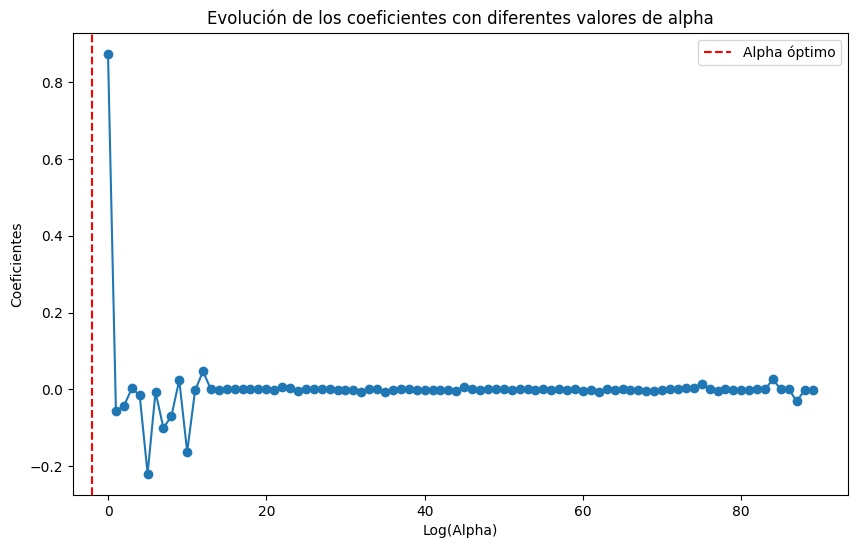

In [218]:
# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.plot(modelo_lasso.coef_, marker='o', linestyle='-')
plt.xscale('linear')
plt.xlabel('Log(Alpha)')
plt.ylabel('Coeficientes')
plt.title('Evolución de los coeficientes con diferentes valores de alpha')
plt.axvline(np.log10(best_alpha), color='r', linestyle='--', label='Alpha óptimo')
plt.legend()
plt.show()



---


# Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su significancia y su $R ^ 2$   $_adj$.


---




In [219]:
import statsmodels.api as sm

# Crear el conjunto de datos reducido con las características seleccionadas
X_selected_train = X_train[:, selected_features]
X_selected_test = X_test[:, selected_features]

# Añadir una constante para el modelo de statsmodels (intercepto)
X_selected_train_const = sm.add_constant(X_selected_train)
X_selected_test_const = sm.add_constant(X_selected_test)

***Ajustamos el modelo OLS***

In [220]:
# Ajustar el modelo OLS con el conjunto de datos reducido

ols_model = sm.OLS(y_train, X_selected_train_const).fit()

# Resumen del modelo

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1522.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:33:07   Log-Likelihood:            -1.5155e+06
No. Observations:              412276   AIC:                         3.031e+06
Df Residuals:                  412191   BIC:                         3.032e+06
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1998.3950      0.015   1.34e+05      0.0

***Interpretación de su significancia y $R ^ 2$ adj***

**$R ^ 2$ = 0.237**, este valor es relativamente bajo, lo que sugiere que las características que se han utilizado en el modelo no explican bien la variabilidad de la variable dependiente. Esto nos puede indicar que el modelo es poco adecuado para predecir la variable o que la relación entre las variables explicativas y la variable dependiente es débil.

.

**$R ^ 2$ ajustado** = 0.237,  el $R ^ 2$ ajustado es igual a $R ^ 2$ dado a que el número de variables en el modelo no ha aumentado lo suficiente como para que el $R ^ 2$ ajustado penalice de manera significativa el número de características. El $R ^ 2$ ajustado ajusta el valor de $R ^ 2$ penalizando la inclusión de variables poco importantes, y en este caso no hay una gran diferencia entre los dos, lo que podría ser una señal de que las variables seleccionadas están aportando algo de valor.

# Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la conveniencia de usar este modelo para predecir el año de grabación de la canción.

Los supuestos de los errores en la regresión OLS son condiciones necesarias para que las estimaciones del modelo sean válidas y para que las inferencias estadísticas (como los valores p de los coeficientes) sean confiables.

***Supuestos de los errores en la regresión OLS***

**Linealidad:** Si observamos que los residuos no siguen una distribución aleatoria (por ejemplo, si hay patrones no lineales), este supuesto podría no cumplirse. Esto indicaría que el modelo no está capturando adecuadamente las relaciones entre las variables y que podría ser necesario un modelo más complejo (por ejemplo, regresión polinómica o un modelo no lineal).

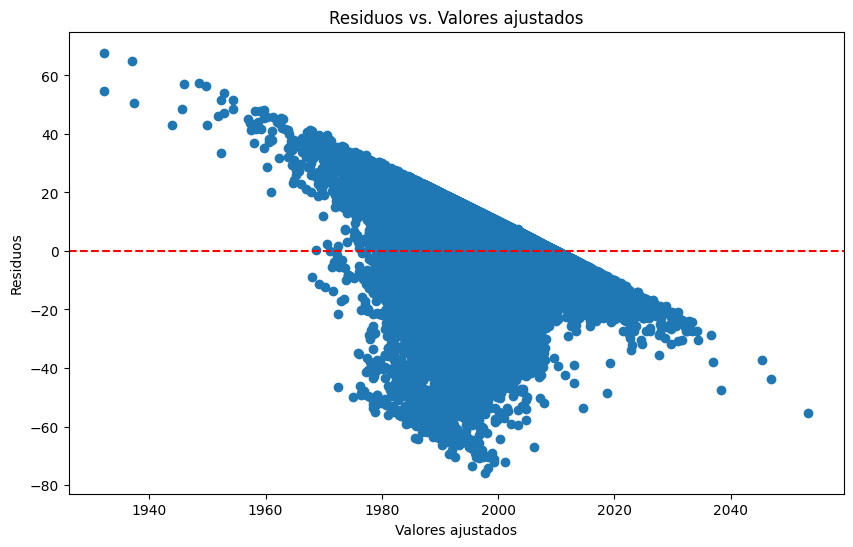

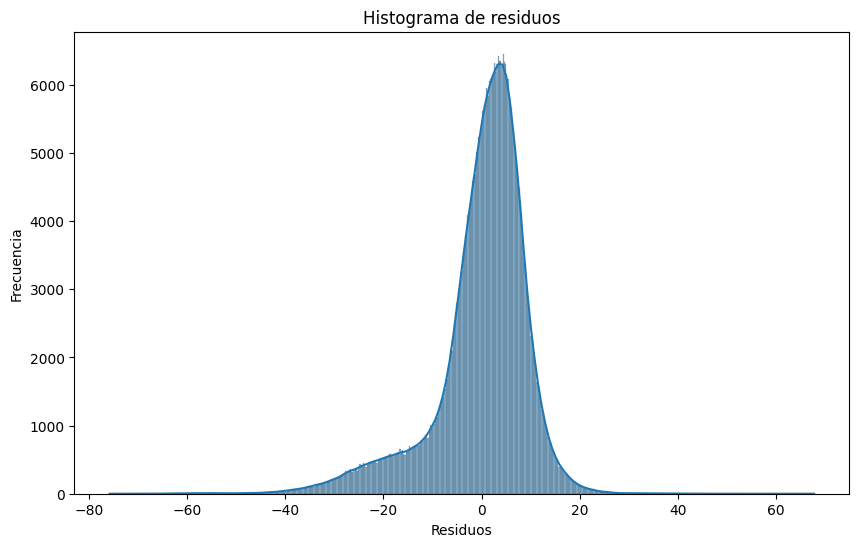

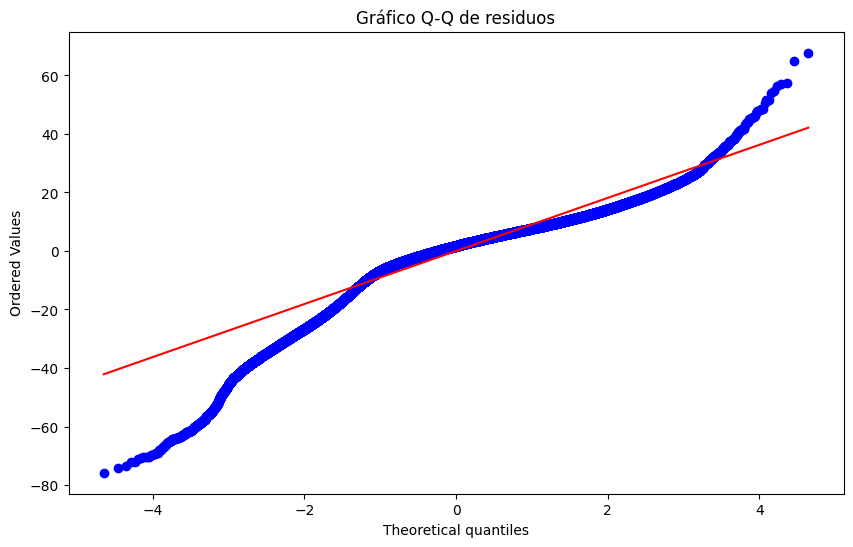

In [221]:
import scipy.stats as stats

# Residuos del modelo OLS
residuos = ols_model.resid

# 1. Gráfico de residuos vs. valores ajustados
fitted_values = ols_model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores ajustados')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.show()

# 2. Histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# 3. Gráfico Q-Q de residuos
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de residuos')
plt.show()



---


**CONCLUSIONES**

---



Al validar el gráfico Q-Q podemos observar que los puntos no siguen una linea recta lo cual indica que los residuos no siguen una distribución normal, teniendo en cuenta ese resultado es necesario realizar una transformación sobre los datos o considerar otro tipo de modelo.

El resultado de significancia y R² muestra valores relativamente bajos, lo que sugiere que las características que se han utilizado en el modelo no explican bien la variabilidad de la variable dependiente. Esto nos puede indicar que el modelo es poco adecuado para predecir la variable o que la relación entre las variables explicativas y la variable dependiente es débil.

Es necesario usar otras técnicas de regularización que nos puedan dar un mejor resultado.

Se debe verificar si es útil probar otros modelos que nos arrojen mejores resultados, como modelos de árbol de decisión o redes neuronales, que pueden manejar mejor relaciones no lineales y problemas de multicolinealidad.

LASSO asume que hay una relación lineal entre las variables independientes y la variable dependiente. Si las relaciones son no lineales, LASSO puede no capturar correctamente estas relaciones, ya que se basa en una regresión lineal por lo cual es una buena opción aplicar otros modelos, por ejemplo ElasticNet.